## Download Dataset

In [1]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

--2023-07-14 05:35:48--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 96.17.188.215, 2600:1413:b000:793::317f, 2600:1413:b000:78a::317f
Connecting to download.microsoft.com (download.microsoft.com)|96.17.188.215|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_5340.zip’

kagglecatsanddogs_5 100%[===================>] 786.67M  79.0MB/s    in 11s     

2023-07-14 05:35:59 (72.9 MB/s) - ‘kagglecatsanddogs_5340.zip’ saved [824887076/824887076]



## Unzip the Dataset

In [2]:
!unzip kagglecatsanddogs_5340.zip

Streaming output truncated to the last 5000 lines.
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  
  inflating: PetImages/Dog/5522.jpg  

In [3]:
!pip install --upgrade keras tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 49.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 111.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 47.9 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.12.3
    Uninstalling tensorboard-2.12

## Import Modules

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os
import random
import tqdm
from keras.preprocessing.image import load_img
warnings.filterwarnings('ignore')

## Create Dataframe for Input and Output

In [5]:
input_path = []
label = []

for folder in os.listdir("PetImages"):
    for path in os.listdir("PetImages/"+folder):
        if folder == 'Cat':
           label.append(0)
        else:
           label.append(1)
        input_path.append(os.path.join("PetImages",folder,path))
print(input_path[0],label[0])

PetImages/Dog/7006.jpg 1


In [6]:
df = pd.DataFrame()
df['images'] = input_path
df['label'] = label
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,images,label
0,PetImages/Dog/8377.jpg,1
1,PetImages/Cat/8668.jpg,0
2,PetImages/Cat/5337.jpg,0
3,PetImages/Cat/10359.jpg,0
4,PetImages/Cat/8984.jpg,0


In [7]:
for i in df['images']:
    if '.jpg' not in i:
        print(i)

PetImages/Cat/Thumbs.db
PetImages/Dog/Thumbs.db


In [8]:
import PIL
l = []
for image in df['images']:
    try:
        image = PIL.Image.open(image)
    except:
           l.append(image)

In [9]:
#Delete DB files
df=df[df['images']!='PetImages/Cat/Thumbs.db']
df=df[df['images']!='PetImages/Dog/Thumbs.db']
df=df[df['images']!='PetImages/Cat/666.jpg']
df=df[df['images']!='PetImages/Dog/11702.jpg']
len(df)

24998

## Exploratory Data Analysis

In [10]:
# to display grid of images
plt.figure(figsize=(25,25))
temp = df[df['label']==1]['images']
start = random.randint(0,len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
    plt.subplot(5,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('Dog')
    plt.axis('off')

Output hidden; open in https://colab.research.google.com to view.

In [11]:
# to display grid of images
plt.figure(figsize=(25,25))
temp = df[df['label']==0]['images']
start = random.randint(0,len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
    plt.subplot(5,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('Cat')
    plt.axis('off')

Output hidden; open in https://colab.research.google.com to view.

## Create Data Generator for the Images

In [12]:
df['label'] = df['label'].astype('str')

In [13]:
df.head()

,images,label
0,PetImages/Dog/8377.jpg,1
1,PetImages/Cat/8668.jpg,0
2,PetImages/Cat/5337.jpg,0
3,PetImages/Cat/10359.jpg,0
4,PetImages/Cat/8984.jpg,0


In [14]:
#input split
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [15]:
test.head()

,images,label
6869,PetImages/Cat/8482.jpg,0
22914,PetImages/Cat/2282.jpg,0
9669,PetImages/Cat/11724.jpg,0
13640,PetImages/Dog/3791.jpg,1
23341,PetImages/Dog/6366.jpg,1


In [16]:
from keras.preprocessing.image import ImageDataGenerator

#This step is done so that it could give accurate predictions for our test data
train_generator = ImageDataGenerator(
    rescale = 1./255, #normalization of images to make easy for us to train the model
    rotation_range = 40, #augmentation of images to avoid overfitting
    shear_range = 0.2, #to shift the pixels of image horizontally or vertically
    zoom_range = 0.2, #to zoom image
    horizontal_flip = True, #to produce mirror image
    fill_mode = 'nearest'
)

val_generator = ImageDataGenerator(rescale = 1./255)

train_iterator = train_generator.flow_from_dataframe(
    train,
    x_col='images',
    y_col='label',
    target_size=(128,128), #Image size to be trained
    batch_size=512, #create a batch of images
    class_mode='binary'#for two classes. For multiple classes we will use category
    )

val_iterator = val_generator.flow_from_dataframe(
    test,
    x_col='images',
    y_col='label',
    target_size=(128,128), #Image size to be trained
    batch_size=512, #create a batch of images
    class_mode='binary'#for two classes. For multiple classes we will use category
    )



Found 19998 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


## Model Creation

In [17]:
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential([
                     Conv2D(16, (3,3),activation='relu',input_shape=(128,128,3)),#INPUT layer
                     MaxPool2D((2,2)),
                     Conv2D(32, (3,3),activation='relu'),#Hidden layer
                     MaxPool2D((2,2)),
                     Conv2D(64, (3,3),activation='relu'),#Hidden layer
                     MaxPool2D((2,2)),
                     Flatten(),#Get the output and convert it into 1-D array
                     Dense(512, activation='relu'),#Dense layer
                     Dense(1, activation='sigmoid')#for binary class we will use sigmoid
])

In [18]:
import tensorflow as tf

model.compile(optimizer='adam', loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 64)        0

In [19]:
from keras.callbacks import ModelCheckpoint

# Define a ModelCheckpoint callback to save the model weights during training
checkpoint_callback = ModelCheckpoint(os.path.join('models','model_checkpoint.h5'), save_weights_only=True, save_best_only=True)

# Train the model and include the checkpoint callback
history = model.fit(train_iterator, epochs=50, validation_data=val_iterator, callbacks=[checkpoint_callback])

Epoch 1/50
40/40 [==============================] - 182s 4s/step - loss: 0.6988 - accuracy: 0.5567 - val_loss: 0.6495 - val_accuracy: 0.6296
Epoch 2/50
40/40 [==============================] - 166s 4s/step - loss: 0.6227 - accuracy: 0.6589 - val_loss: 0.6014 - val_accuracy: 0.6768
Epoch 3/50
40/40 [==============================] - 173s 4s/step - loss: 0.5837 - accuracy: 0.6881 - val_loss: 0.5489 - val_accuracy: 0.7246
Epoch 4/50
40/40 [==============================] - 168s 4s/step - loss: 0.5673 - accuracy: 0.7040 - val_loss: 0.5298 - val_accuracy: 0.7410
Epoch 5/50
40/40 [==============================] - 165s 4s/step - loss: 0.5535 - accuracy: 0.7163 - val_loss: 0.5258 - val_accuracy: 0.7462
Epoch 6/50
40/40 [==============================] - 165s 4s/step - loss: 0.5284 - accuracy: 0.7320 - val_loss: 0.5054 - val_accuracy: 0.7564
Epoch 7/50
40/40 [==============================] - 166s 4s/step - loss: 0.5163 - accuracy: 0.7442 - val_loss: 0.4800 - val_accuracy: 0.7760
Epoch 8/50
40

## Plotting Accuracy and Loss

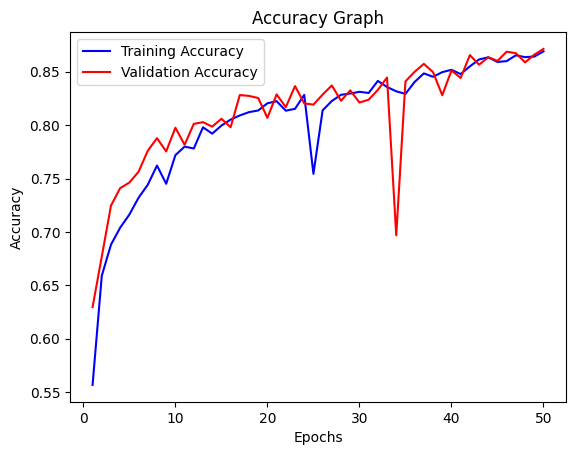

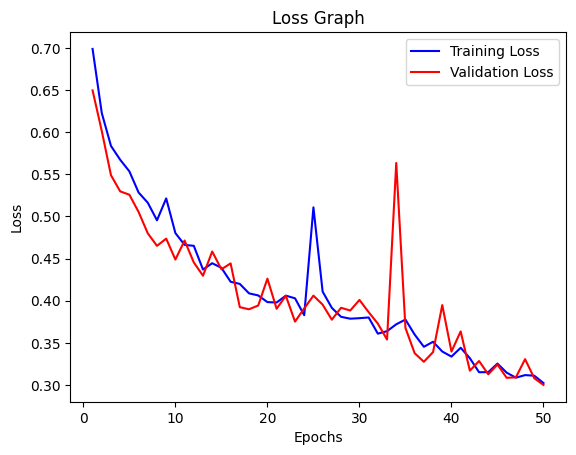

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)  # Corrected line

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.xlabel('Epochs')  # Added x-label
plt.ylabel('Accuracy')  # Added y-label
plt.legend()
plt.savefig(os.path.join('Statistical Analysis','loss_graph.png'))
plt.show()

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, 'b', label='Training Loss')  # Corrected line
plt.plot(epochs, val_loss, 'r', label='Validation Loss')  # Corrected line
plt.title('Loss Graph')
plt.xlabel('Epochs')  # Added x-label
plt.ylabel('Loss')  # Added y-label
plt.legend()
plt.savefig(os.path.join('Statistical Analysis','loss_graph.png'))
plt.show()


## Predicting Outcome

In [21]:
import pandas as pd

# Perform predictions on random 100 images
random_samples = df.sample(n=5000, random_state=42)
random_iterator = val_generator.flow_from_dataframe(
    random_samples,
    x_col='images',
    y_col='label',
    target_size=(128, 128),
    batch_size=1,
    class_mode='binary',
    shuffle=False
)

predictions = model.predict(random_iterator)
predicted_labels = (predictions > 0.5).astype(int)

# Create a DataFrame to store the filename and predicted label
results = pd.DataFrame({'Filename': random_samples['images'], 'Predicted': predicted_labels.flatten()})
results['Predicted'] = results['Predicted'].map({0: 'Cat', 1: 'Dog'})

# Display the DataFrame
print(results)

Found 5000 validated image filenames belonging to 2 classes.
5000/5000 [==============================] - 27s 5ms/step
                      Filename Predicted
6869    PetImages/Cat/8482.jpg       Dog
22914   PetImages/Cat/2282.jpg       Dog
9669   PetImages/Cat/11724.jpg       Dog
13640   PetImages/Dog/3791.jpg       Dog
23341   PetImages/Dog/6366.jpg       Dog
...                        ...       ...
8671    PetImages/Cat/3443.jpg       Cat
11840   PetImages/Dog/5261.jpg       Dog
4013    PetImages/Dog/7799.jpg       Dog
16241   PetImages/Cat/7543.jpg       Cat
695    PetImages/Dog/10651.jpg       Dog

[5000 rows x 2 columns]


## Evaluating the Model

Precision: 0.8620
Recall: 0.8798
Accuracy: 0.8714
F1 Score: 0.8708


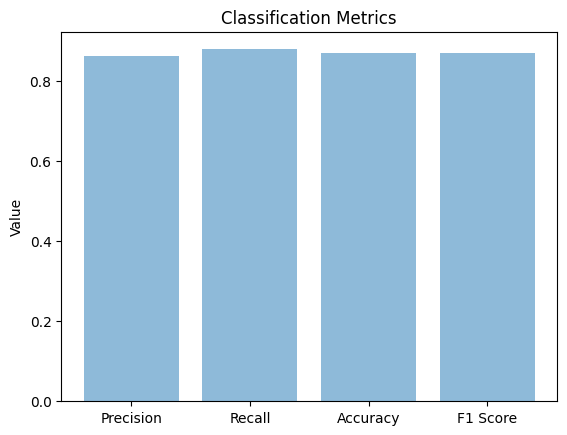

In [22]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

# Get the true labels from the random samples
true_labels = random_iterator.labels

# Calculate metrics
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
accuracy = accuracy_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)

# Create a bar graph of the metrics
metrics = ['Precision', 'Recall', 'Accuracy', 'F1 Score']
values = [precision, recall, accuracy, f1]

# Display values and bar graph
for metric, value in zip(metrics, values):
    print("{}: {:.4f}".format(metric, value))

x_pos = range(len(metrics))
plt.bar(x_pos, values, align='center', alpha=0.5)
plt.xticks(x_pos, metrics)
plt.ylabel('Value')
plt.title('Classification Metrics')

# Save the bar graph as an image
plt.savefig(os.path.join('Statistical Analysis','metrics_bar_graph.png'))

## Saving the Predictions and Model

In [23]:
# Save the results to a CSV file
results.to_csv(os.path.join('Statistical Analysis', 'predictions.csv'), index=False)
print("Predictions saved to predictions.csv")

# Save the model
model.save(os.path.join('models','image_classifier_model.h5'))
print("Model saved successfully.")

Predictions saved to predictions.csv
Model saved successfully.


In [25]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
